# HOTEL BOOKING   DEMAND

In [2]:
#Importing the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Ignore harmless warnings

import warnings
warnings.filterwarnings("ignore")

#Set to display all the columns in dataset

pd.set_option("display.max_columns", None)

#Import psql to run queries

import pandasql as psql

In [3]:
#Importing the data

train0 = pd.read_csv("hotel_bookings.csv", header=0)
train0
#Copy to back_up files
train1 = train0.copy()
#Display first 5 records
 
train0.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [4]:
# Display the dataset information
train0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [5]:
print(train0.shape)
print(train0.describe())

(119390, 32)
         is_canceled      lead_time  arrival_date_year  \
count  119390.000000  119390.000000      119390.000000   
mean        0.370416     104.011416        2016.156554   
std         0.482918     106.863097           0.707476   
min         0.000000       0.000000        2015.000000   
25%         0.000000      18.000000        2016.000000   
50%         0.000000      69.000000        2016.000000   
75%         1.000000     160.000000        2017.000000   
max         1.000000     737.000000        2017.000000   

       arrival_date_week_number  arrival_date_day_of_month  \
count             119390.000000              119390.000000   
mean                  27.165173                  15.798241   
std                   13.605138                   8.780829   
min                    1.000000                   1.000000   
25%                   16.000000                   8.000000   
50%                   28.000000                  16.000000   
75%                   38.00000

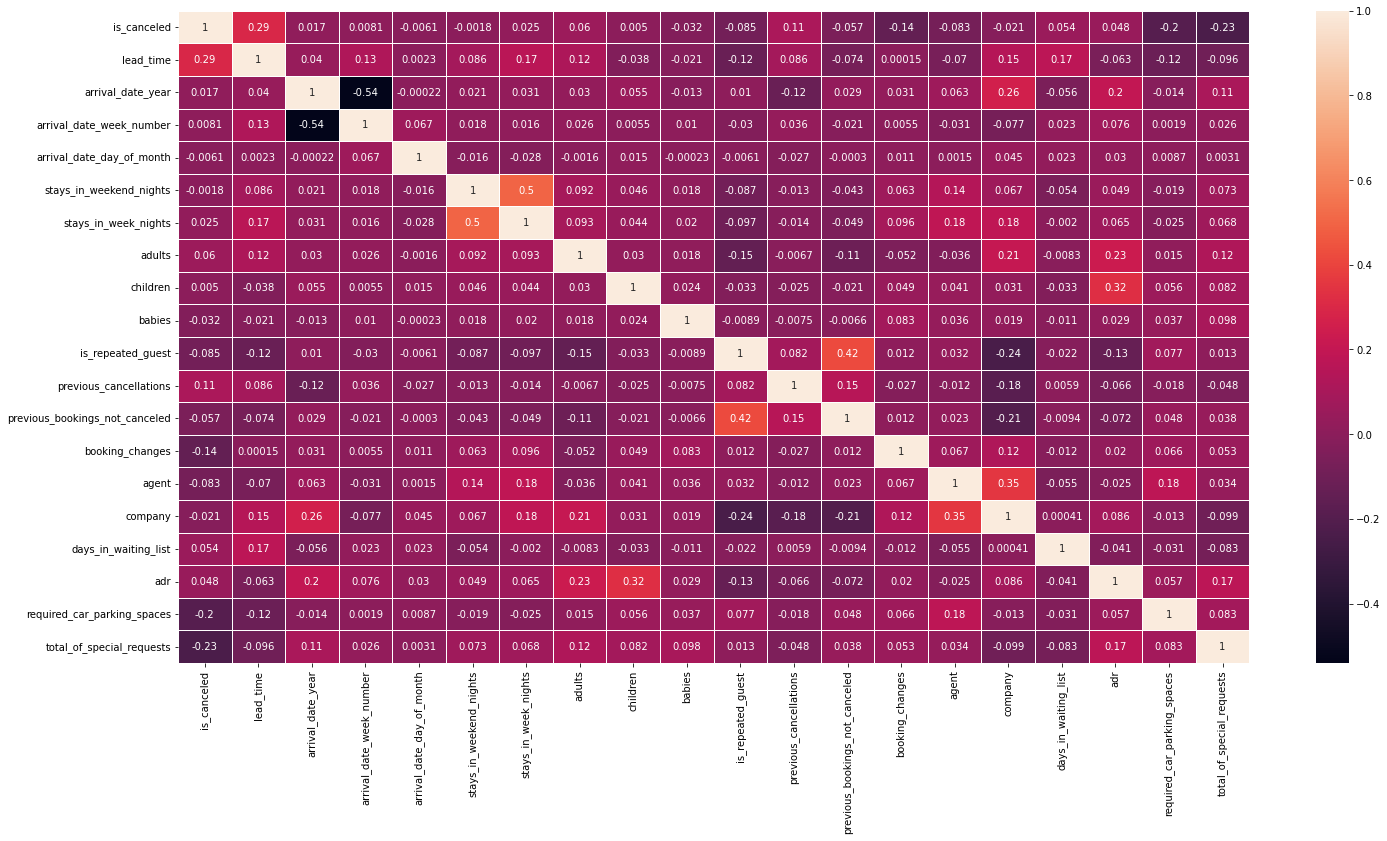

In [6]:
#heat map to look for the correlated attributes
plt.figure(figsize = (24, 12))

corr = train0.corr()
sns.heatmap(corr, annot = True, linewidths = 1)
plt.show()

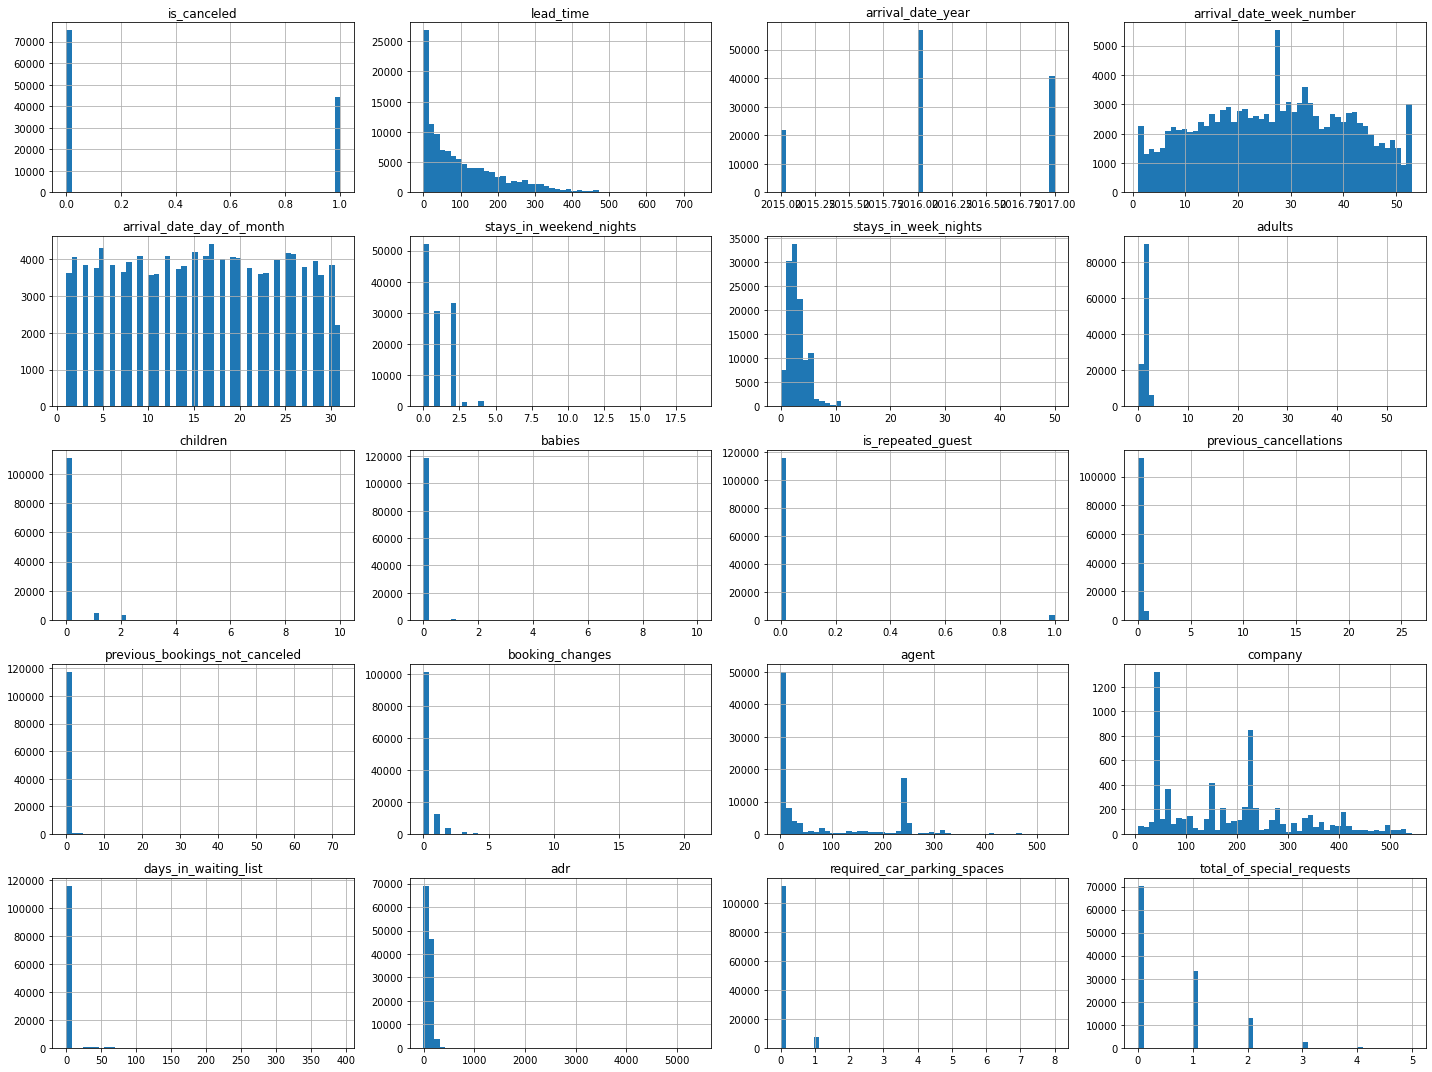

In [7]:
train0.hist(bins=50, figsize=(20,15))
plt.tight_layout()
plt.show()

# Booking by market segment

Text(0.5, 1.0, 'Bokkings by market segment')

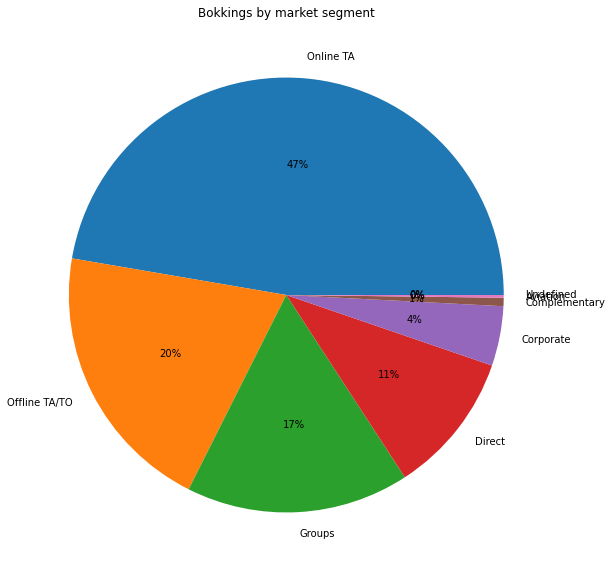

In [9]:
d = train0['market_segment'].value_counts()
plt.figure(figsize=(10, 10))
p = plt.pie(d, labels=d.index, autopct="%.0f%%")
plt.title("Bokkings by market segment")

# Counts of Cancelled Vs Not-Cancelled Booking in different types of hotels

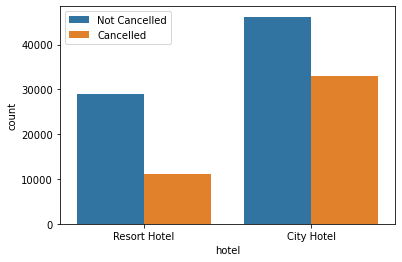

In [10]:
sns.countplot(x='hotel', hue='is_canceled', data=train0)
plt.legend(['Not Cancelled', 'Cancelled'])

In [7]:
#plotting each feature wrt y
for i in train0.columns:
    try:
        print(i, " : ", train0[i].corr(train0['is_canceled'], 'pearson'))
        print("-----------------")
        #df0.plot.scatter(x = df0[i], y = df0['is_canceled'])
        #plt.scatter(np.array(df0[i]), np.array(df0['is_canceled']))
        #plt.show()
    except:
        pass

is_canceled  :  1.0
-----------------
lead_time  :  0.2931233557607179
-----------------
arrival_date_year  :  0.016659860238734996
-----------------
arrival_date_week_number  :  0.008148065395051645
-----------------
arrival_date_day_of_month  :  -0.006130078862758013
-----------------
stays_in_weekend_nights  :  -0.0017910780782607718
-----------------
stays_in_week_nights  :  0.024764629045872167
-----------------
adults  :  0.06001721283956561
-----------------
children  :  0.005047790029268632
-----------------
babies  :  -0.032491089208332345
-----------------
is_repeated_guest  :  -0.084793418357088
-----------------
previous_cancellations  :  0.11013280822284173
-----------------
previous_bookings_not_canceled  :  -0.05735772316594634
-----------------
booking_changes  :  -0.14438099106132532
-----------------
agent  :  -0.08311415905369239
-----------------
company  :  -0.020642070628256518
-----------------
days_in_waiting_list  :  0.05418582411778179
-----------------
adr  :

In [8]:
#Removing unrequired columns using correlation 

Corr_Matrix = round(train0.corr(),5)
Corr_Matrix['is_canceled']
print('-----------------------------')
c=abs(Corr_Matrix['is_canceled'])
c

-----------------------------


is_canceled                       1.00000
lead_time                         0.29312
arrival_date_year                 0.01666
arrival_date_week_number          0.00815
arrival_date_day_of_month         0.00613
stays_in_weekend_nights           0.00179
stays_in_week_nights              0.02476
adults                            0.06002
children                          0.00505
babies                            0.03249
is_repeated_guest                 0.08479
previous_cancellations            0.11013
previous_bookings_not_canceled    0.05736
booking_changes                   0.14438
agent                             0.08311
company                           0.02064
days_in_waiting_list              0.05419
adr                               0.04756
required_car_parking_spaces       0.19550
total_of_special_requests         0.23466
Name: is_canceled, dtype: float64

In [9]:
train1 = train0.sample(frac=1)

d = ['arrival_date_year', 'stays_in_weekend_nights', 'reservation_status_date', 'reservation_status','agent', 'adr', 'company','children','babies', 'days_in_waiting_list']
train2 = train1.drop(d, axis='columns')
train2

,hotel,is_canceled,lead_time,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_week_nights,adults,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,customer_type,required_car_parking_spaces,total_of_special_requests
104842,City Hotel,0,42,January,3,19,3,2,BB,BRA,Online TA,TA/TO,0,0,0,F,G,2,No Deposit,Transient,0,1
92933,City Hotel,0,89,July,28,7,5,2,BB,ITA,Online TA,TA/TO,0,0,0,F,F,0,No Deposit,Transient,0,1
86193,City Hotel,0,1,March,14,28,0,2,BB,BEL,Online TA,TA/TO,0,0,0,A,D,0,No Deposit,Transient,0,0
95825,City Hotel,0,231,August,35,21,2,2,BB,FIN,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,Transient-Party,0,1
117803,City Hotel,0,108,August,32,6,2,2,HB,ESP,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,Transient,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61057,City Hotel,1,510,December,49,1,2,2,BB,PRT,Groups,TA/TO,0,0,0,A,A,0,Non Refund,Transient,0,0
35561,Resort Hotel,0,28,April,16,17,7,2,BB,GBR,Offline TA/TO,TA/TO,0,0,0,D,D,0,No Deposit,Contract,0,0
9123,Resort Hotel,1,72,October,44,28,4,2,BB,BEL,Online TA,TA/TO,0,0,0,E,E,2,No Deposit,Transient,0,2
38374,Resort Hotel,0,93,July,28,9,5,2,BB,ROU,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,Transient,0,0


In [10]:
count = train2['is_canceled'].value_counts()
print('class 0:',count[0])
print('class 1:',count[1])
print("pro :",count[0]/count[1],":1")

class 0: 75166
class 1: 44224
pro : 1.6996653400868307 :1


In [11]:
#checking for null/ na

for i in train2.columns:
    print(i, " : ", train2[i].isnull().sum())
train3 = train2.dropna()
train3.shape

hotel  :  0
is_canceled  :  0
lead_time  :  0
arrival_date_month  :  0
arrival_date_week_number  :  0
arrival_date_day_of_month  :  0
stays_in_week_nights  :  0
adults  :  0
meal  :  0
country  :  488
market_segment  :  0
distribution_channel  :  0
is_repeated_guest  :  0
previous_cancellations  :  0
previous_bookings_not_canceled  :  0
reserved_room_type  :  0
assigned_room_type  :  0
booking_changes  :  0
deposit_type  :  0
customer_type  :  0
required_car_parking_spaces  :  0
total_of_special_requests  :  0


(118902, 22)

In [12]:
#finding string columns
def find(train, x):
    try:
        float(train[x][1])
        return False
    except:
        return True

#li = [find(train2, x) for x in train2.columns]

for i in train2.columns:
    if find(train2, i):
        print("-----------------")
        print(train2[i].value_counts())

-----------------
City Hotel      79330
Resort Hotel    40060
Name: hotel, dtype: int64
-----------------
August       13877
July         12661
May          11791
October      11160
April        11089
June         10939
September    10508
March         9794
February      8068
November      6794
December      6780
January       5929
Name: arrival_date_month, dtype: int64
-----------------
BB           92310
HB           14463
SC           10650
Undefined     1169
FB             798
Name: meal, dtype: int64
-----------------
PRT    48590
GBR    12129
FRA    10415
ESP     8568
DEU     7287
       ...  
NIC        1
AIA        1
VGB        1
PYF        1
LCA        1
Name: country, Length: 177, dtype: int64
-----------------
Online TA        56477
Offline TA/TO    24219
Groups           19811
Direct           12606
Corporate         5295
Complementary      743
Aviation           237
Undefined            2
Name: market_segment, dtype: int64
-----------------
TA/TO        97870
Direct       

In [13]:
encode_cols = [
'hotel',
'arrival_date_month',
'meal',
'reserved_room_type',
'distribution_channel',
'market_segment',
'deposit_type',
'customer_type',
'assigned_room_type',
'country']

train3 = train2.copy()

from sklearn.preprocessing import LabelEncoder

LE = LabelEncoder()

for i in encode_cols:
    train3[i] = LE.fit_transform(np.ravel(train3[[i]]))

In [14]:
for i in train3.columns:
    print(train3[i].value_counts())
    print("----------")

0    79330
1    40060
Name: hotel, dtype: int64
----------
0    75166
1    44224
Name: is_canceled, dtype: int64
----------
0      6345
1      3460
2      2069
3      1816
4      1715
       ... 
435       1
532       1
463       1
424       1
371       1
Name: lead_time, Length: 479, dtype: int64
----------
1     13877
5     12661
8     11791
10    11160
0     11089
6     10939
11    10508
7      9794
3      8068
9      6794
2      6780
4      5929
Name: arrival_date_month, dtype: int64
----------
33    3580
30    3087
32    3045
34    3040
18    2926
21    2854
28    2853
17    2805
20    2785
29    2763
42    2756
31    2741
41    2699
15    2689
27    2664
25    2663
38    2661
23    2621
35    2593
39    2581
22    2546
24    2498
13    2416
16    2405
19    2402
40    2397
26    2391
43    2352
44    2272
14    2264
37    2229
8     2216
36    2167
10    2149
9     2117
7     2109
12    2083
11    2070
45    1941
53    1816
49    1782
47    1685
46    1574
6     1508
50    1505
4

In [15]:
y = "is_canceled"

train3 = train3.dropna()

cols = []
for i in train3.columns:
    if i != y:
        cols.append(i)

X = train3[cols]
y = train3[y]

for i in train3.columns:
    print(train3[i].isnull().sum())

train3.shape

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


(119390, 22)

In [16]:
#splitting data intotrain and test

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)






In [17]:
#selecting linear regresion model 

from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train, y_train)
lr.score(x_test, y_test)

0.7686992210402881

In [18]:
#confusion matrix for logistic regression
y_pred = lr.predict(x_test)
y_pred_prob = lr.predict_proba(x_test)

# Confusion matrix in sklearn

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# actual values

actual = y_test

# predicted values

predicted = y_pred

# confusion matrix

matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
print('Confusion matrix : \n', matrix)

# outcome values order in sklearn

tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
print('Outcome values : \n', tp, fn, fp, tn)

# classification report for precision, recall f1-score and accuracy

C_Report = classification_report(actual,predicted,labels=[1,0])

print('Classification report : \n', C_Report)

# calculating the metrics

sensitivity = round(tp/(tp+fn), 3);
specificity = round(tn/(tn+fp), 3);
accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
balanced_accuracy = round((sensitivity+specificity)/2, 3);
precision = round(tp/(tp+fp), 3);
f1Score = round((2*tp/(2*tp + fp + fn)), 3);

# Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1. 
# A model with a score of +1 is a perfect model and -1 is a poor model

from math import sqrt

mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)

print('Accuracy :', round(accuracy*100, 2),'%')
print('Precision :', round(precision*100, 2),'%')
print('Recall :', round(sensitivity*100,2), '%')
print('F1 Score :', f1Score)
print('Specificity or True Negative Rate :', round(specificity*100,2), '%'  )
print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
print('MCC :', MCC)

# Area under ROC curve 

from sklearn.metrics import roc_curve, roc_auc_score

print('roc_auc_score:', round(roc_auc_score(y_test, y_pred), 3))


Confusion matrix : 
 [[ 5058  3640]
 [ 1883 13297]]
Outcome values : 
 5058 3640 1883 13297
Classification report : 
               precision    recall  f1-score   support

           1       0.73      0.58      0.65      8698
           0       0.79      0.88      0.83     15180

    accuracy                           0.77     23878
   macro avg       0.76      0.73      0.74     23878
weighted avg       0.76      0.77      0.76     23878

Accuracy : 76.9 %
Precision : 72.9 %
Recall : 58.2 %
F1 Score : 0.647
Specificity or True Negative Rate : 87.6 %
Balanced Accuracy : 72.9 %
MCC : 0.485
roc_auc_score: 0.729


In [19]:
HTResults = []

In [20]:
def plott(models):
    models.fit(x_train, y_train)
    
    # Prediction
    
    y_pred = models.predict(x_test)
    y_pred_prob = models.predict_proba(x_test)
    
    # Print the model name
    
    print('Model Name: ', models)
    
    # confusion matrix in sklearn

    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import classification_report

    # actual values

    actual = y_test

    # predicted values

    predicted = y_pred

    # confusion matrix

    matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
    print('Confusion matrix : \n', matrix)

    # outcome values order in sklearn

    tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
    print('Outcome values : \n', tp, fn, fp, tn)

    # classification report for precision, recall f1-score and accuracy

    C_Report = classification_report(actual,predicted,labels=[1,0])

    print('Classification report : \n', C_Report)

    # calculating the metrics

    sensitivity = round(tp/(tp+fn), 3);
    specificity = round(tn/(tn+fp), 3);
    accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
    balanced_accuracy = round((sensitivity+specificity)/2, 3);
    
    precision = round(tp/(tp+fp), 3);
    f1Score = round((2*tp/(2*tp + fp + fn)), 3);

    # Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1. 
    # A model with a score of +1 is a perfect model and -1 is a poor model

    from math import sqrt

    mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
    MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)

    print('Accuracy :', round(accuracy*100, 2),'%')
    print('Precision :', round(precision*100, 2),'%')
    print('Recall :', round(sensitivity*100,2), '%')
    print('F1 Score :', f1Score)
    print('Specificity or True Negative Rate :', round(specificity*100,2), '%'  )
    print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
    print('MCC :', MCC)

    # Area under ROC curve 

    from sklearn.metrics import roc_curve, roc_auc_score

    print('roc_auc_score:', round(roc_auc_score(actual, predicted), 3))
    
    # ROC Curve
    
    from sklearn.metrics import roc_auc_score
    from sklearn.metrics import roc_curve
    logit_roc_auc = roc_auc_score(actual, predicted)
    fpr, tpr, thresholds = roc_curve(actual, models.predict_proba(x_test)[:,1])
    plt.figure()
    # plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
    plt.plot(fpr, tpr, label= 'Classification Model' % logit_roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.savefig('Log_ROC')
    plt.show()
    print('-----------------------------------------------------------------------------------------------------')
    #----------------------------------------------------------------------------------------------------------
    new_row = {'Model Name' : models,
               'True_Positive' : tp, 
               'False_Negative' : fn, 
               'False_Positive' : fp,
               'True_Negative' : tn,
               'Accuracy' : accuracy,
               'Precision' : precision,
               'Recall' : sensitivity,
               'F1 Score' : f1Score,
               'Specificity' : specificity,
               'MCC':MCC,
               'ROC_Score':roc_auc_score(actual, predicted),
               'Balanced Accuracy':balanced_accuracy}
    HTResults.append(new_row)

Model Name:  LogisticRegression()
Confusion matrix : 
 [[ 5058  3640]
 [ 1883 13297]]
Outcome values : 
 5058 3640 1883 13297
Classification report : 
               precision    recall  f1-score   support

           1       0.73      0.58      0.65      8698
           0       0.79      0.88      0.83     15180

    accuracy                           0.77     23878
   macro avg       0.76      0.73      0.74     23878
weighted avg       0.76      0.77      0.76     23878

Accuracy : 76.9 %
Precision : 72.9 %
Recall : 58.2 %
F1 Score : 0.647
Specificity or True Negative Rate : 87.6 %
Balanced Accuracy : 72.9 %
MCC : 0.485
roc_auc_score: 0.729


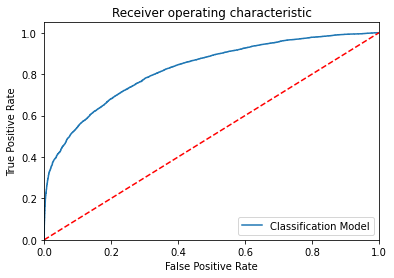

-----------------------------------------------------------------------------------------------------
Model Name:  DecisionTreeClassifier()
Confusion matrix : 
 [[ 6849  1849]
 [ 2001 13179]]
Outcome values : 
 6849 1849 2001 13179
Classification report : 
               precision    recall  f1-score   support

           1       0.77      0.79      0.78      8698
           0       0.88      0.87      0.87     15180

    accuracy                           0.84     23878
   macro avg       0.83      0.83      0.83     23878
weighted avg       0.84      0.84      0.84     23878

Accuracy : 83.9 %
Precision : 77.4 %
Recall : 78.7 %
F1 Score : 0.781
Specificity or True Negative Rate : 86.8 %
Balanced Accuracy : 82.8 %
MCC : 0.653
roc_auc_score: 0.828


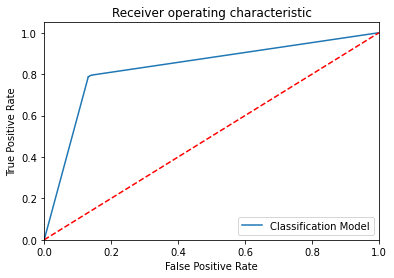

-----------------------------------------------------------------------------------------------------
Model Name:  RandomForestClassifier()
Confusion matrix : 
 [[ 6903  1795]
 [ 1038 14142]]
Outcome values : 
 6903 1795 1038 14142
Classification report : 
               precision    recall  f1-score   support

           1       0.87      0.79      0.83      8698
           0       0.89      0.93      0.91     15180

    accuracy                           0.88     23878
   macro avg       0.88      0.86      0.87     23878
weighted avg       0.88      0.88      0.88     23878

Accuracy : 88.1 %
Precision : 86.9 %
Recall : 79.4 %
F1 Score : 0.83
Specificity or True Negative Rate : 93.2 %
Balanced Accuracy : 86.3 %
MCC : 0.741
roc_auc_score: 0.863


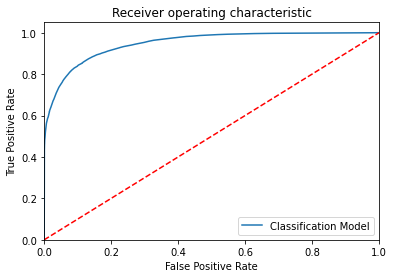

-----------------------------------------------------------------------------------------------------
Model Name:  ExtraTreesClassifier()
Confusion matrix : 
 [[ 6821  1877]
 [ 1036 14144]]
Outcome values : 
 6821 1877 1036 14144
Classification report : 
               precision    recall  f1-score   support

           1       0.87      0.78      0.82      8698
           0       0.88      0.93      0.91     15180

    accuracy                           0.88     23878
   macro avg       0.88      0.86      0.87     23878
weighted avg       0.88      0.88      0.88     23878

Accuracy : 87.8 %
Precision : 86.8 %
Recall : 78.4 %
F1 Score : 0.824
Specificity or True Negative Rate : 93.2 %
Balanced Accuracy : 85.8 %
MCC : 0.733
roc_auc_score: 0.858


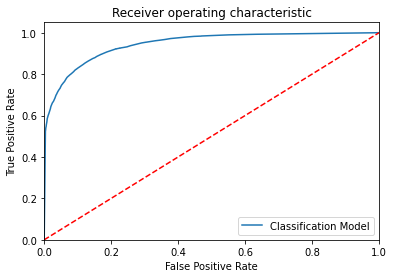

-----------------------------------------------------------------------------------------------------
Model Name:  KNeighborsClassifier()
Confusion matrix : 
 [[ 5866  2832]
 [ 2020 13160]]
Outcome values : 
 5866 2832 2020 13160
Classification report : 
               precision    recall  f1-score   support

           1       0.74      0.67      0.71      8698
           0       0.82      0.87      0.84     15180

    accuracy                           0.80     23878
   macro avg       0.78      0.77      0.78     23878
weighted avg       0.79      0.80      0.79     23878

Accuracy : 79.7 %
Precision : 74.4 %
Recall : 67.4 %
F1 Score : 0.707
Specificity or True Negative Rate : 86.7 %
Balanced Accuracy : 77.0 %
MCC : 0.554
roc_auc_score: 0.771


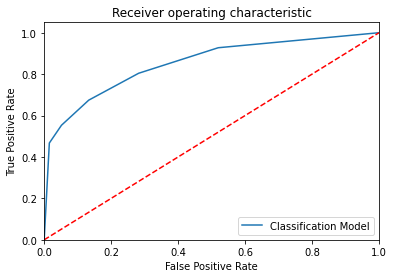

-----------------------------------------------------------------------------------------------------
Model Name:  GradientBoostingClassifier()
Confusion matrix : 
 [[ 6401  2297]
 [ 1499 13681]]
Outcome values : 
 6401 2297 1499 13681
Classification report : 
               precision    recall  f1-score   support

           1       0.81      0.74      0.77      8698
           0       0.86      0.90      0.88     15180

    accuracy                           0.84     23878
   macro avg       0.83      0.82      0.82     23878
weighted avg       0.84      0.84      0.84     23878

Accuracy : 84.1 %
Precision : 81.0 %
Recall : 73.6 %
F1 Score : 0.771
Specificity or True Negative Rate : 90.1 %
Balanced Accuracy : 81.8 %
MCC : 0.652
roc_auc_score: 0.819


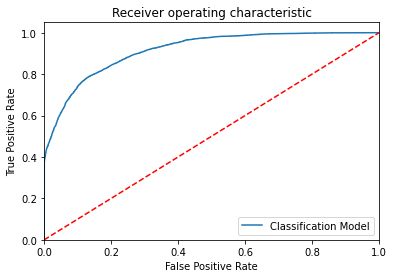

-----------------------------------------------------------------------------------------------------
Model Name:  LGBMClassifier()
Confusion matrix : 
 [[ 6680  2018]
 [ 1322 13858]]
Outcome values : 
 6680 2018 1322 13858
Classification report : 
               precision    recall  f1-score   support

           1       0.83      0.77      0.80      8698
           0       0.87      0.91      0.89     15180

    accuracy                           0.86     23878
   macro avg       0.85      0.84      0.85     23878
weighted avg       0.86      0.86      0.86     23878

Accuracy : 86.0 %
Precision : 83.5 %
Recall : 76.8 %
F1 Score : 0.8
Specificity or True Negative Rate : 91.3 %
Balanced Accuracy : 84.0 %
MCC : 0.694
roc_auc_score: 0.84


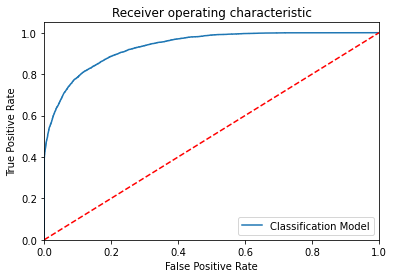

-----------------------------------------------------------------------------------------------------
Model Name:  GaussianNB()
Confusion matrix : 
 [[7773  925]
 [9422 5758]]
Outcome values : 
 7773 925 9422 5758
Classification report : 
               precision    recall  f1-score   support

           1       0.45      0.89      0.60      8698
           0       0.86      0.38      0.53     15180

    accuracy                           0.57     23878
   macro avg       0.66      0.64      0.56     23878
weighted avg       0.71      0.57      0.55     23878

Accuracy : 56.7 %
Precision : 45.2 %
Recall : 89.4 %
F1 Score : 0.6
Specificity or True Negative Rate : 37.9 %
Balanced Accuracy : 63.7 %
MCC : 0.293
roc_auc_score: 0.636


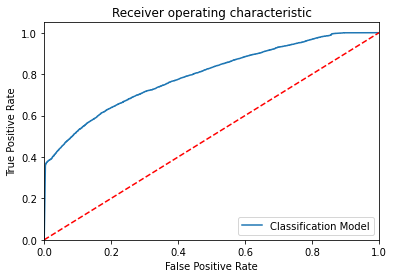

-----------------------------------------------------------------------------------------------------
Model Name:  XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='mlogloss', gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_to_onehot=4, max_delta_step=0, max_depth=3,
              max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)
Confusion matrix : 
 [[ 6625  2073]
 [ 1575 13605]]
Outcome values : 
 6625 2073 1575 13605
Classification report : 
               precision    recall  f1-score   su

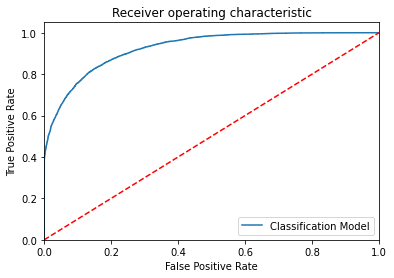

-----------------------------------------------------------------------------------------------------
Model Name:  SVC(probability=True)
Confusion matrix : 
 [[ 4686  4012]
 [ 1888 13292]]
Outcome values : 
 4686 4012 1888 13292
Classification report : 
               precision    recall  f1-score   support

           1       0.71      0.54      0.61      8698
           0       0.77      0.88      0.82     15180

    accuracy                           0.75     23878
   macro avg       0.74      0.71      0.72     23878
weighted avg       0.75      0.75      0.74     23878

Accuracy : 75.3 %
Precision : 71.3 %
Recall : 53.9 %
F1 Score : 0.614
Specificity or True Negative Rate : 87.6 %
Balanced Accuracy : 70.8 %
MCC : 0.446
roc_auc_score: 0.707


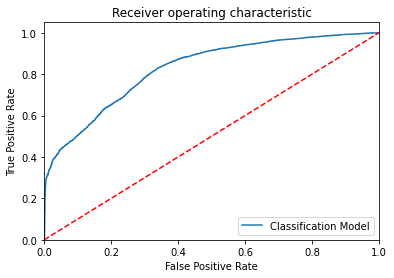

-----------------------------------------------------------------------------------------------------


In [21]:
# Build the Calssification models and compare the results

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from xgboost import XGBClassifier


from sklearn.ensemble import GradientBoostingClassifier
import lightgbm as lgb

# Create objects of classification algorithm with default hyper-parameters


ModelLR = LogisticRegression()
ModelDC = DecisionTreeClassifier()
ModelRF = RandomForestClassifier()
ModelET = ExtraTreesClassifier()
ModelKNN = KNeighborsClassifier(n_neighbors=5)
#modelBAG = BaggingClassifier()
ModelGB = GradientBoostingClassifier()
ModelLGB = lgb.LGBMClassifier()
ModelGNB = GaussianNB()
ModelXGB = XGBClassifier(n_estimators=100, max_depth=3, eval_metric='mlogloss')
ModelSVM = SVC(probability = True)

# Evalution matrix for all the algorithms

MM = [ModelLR, ModelDC, ModelRF, ModelET,ModelKNN, ModelGB, ModelLGB, ModelGNB, ModelXGB, ModelSVM]
for models in MM:
    plott(models)


In [22]:
ans = pd.DataFrame(HTResults)
ans

,Model Name,True_Positive,False_Negative,False_Positive,True_Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_Score,Balanced Accuracy
0,LogisticRegression(),5058,3640,1883,13297,0.769,0.729,0.582,0.647,0.876,0.485,0.728734,0.729
1,DecisionTreeClassifier(),6849,1849,2001,13179,0.839,0.774,0.787,0.781,0.868,0.653,0.827802,0.828
2,"(DecisionTreeClassifier(max_features='auto', r...",6903,1795,1038,14142,0.881,0.869,0.794,0.830,0.932,0.741,0.862626,0.863
3,"(ExtraTreeClassifier(random_state=23990978), E...",6821,1877,1036,14144,0.878,0.868,0.784,0.824,0.932,0.733,0.857978,0.858
4,KNeighborsClassifier(),5866,2832,2020,13160,0.797,0.744,0.674,0.707,0.867,0.554,0.770669,0.770
5,([DecisionTreeRegressor(criterion='friedman_ms...,6401,2297,1499,13681,0.841,0.810,0.736,0.771,0.901,0.652,0.818584,0.818
6,LGBMClassifier(),6680,2018,1322,13858,0.860,0.835,0.768,0.800,0.913,0.694,0.840452,0.840
7,GaussianNB(),7773,925,9422,5758,0.567,0.452,0.894,0.600,0.379,0.293,0.636484,0.637
8,"XGBClassifier(base_score=0.5, booster='gbtree'...",6625,2073,1575,13605,0.847,0.808,0.762,0.784,0.896,0.667,0.828957,0.829
9,SVC(probability=True),4686,4012,1888,13292,0.753,0.713,0.539,0.614,0.876,0.446,0.707185,0.708


Model Name:  RandomForestClassifier()
Confusion matrix : 
 [[ 6909  1789]
 [ 1019 14161]]
Outcome values : 
 6909 1789 1019 14161
Classification report : 
               precision    recall  f1-score   support

           1       0.87      0.79      0.83      8698
           0       0.89      0.93      0.91     15180

    accuracy                           0.88     23878
   macro avg       0.88      0.86      0.87     23878
weighted avg       0.88      0.88      0.88     23878

Accuracy : 88.2 %
Precision : 87.1 %
Recall : 79.4 %
F1 Score : 0.831
Specificity or True Negative Rate : 93.3 %
Balanced Accuracy : 86.4 %
MCC : 0.743
roc_auc_score: 0.864


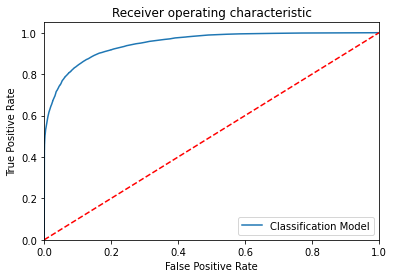

-----------------------------------------------------------------------------------------------------


In [24]:
plott(ModelRF)

Model Name:  ExtraTreesClassifier()
Confusion matrix : 
 [[ 6805  1893]
 [ 1041 14139]]
Outcome values : 
 6805 1893 1041 14139
Classification report : 
               precision    recall  f1-score   support

           1       0.87      0.78      0.82      8698
           0       0.88      0.93      0.91     15180

    accuracy                           0.88     23878
   macro avg       0.87      0.86      0.86     23878
weighted avg       0.88      0.88      0.88     23878

Accuracy : 87.7 %
Precision : 86.7 %
Recall : 78.2 %
F1 Score : 0.823
Specificity or True Negative Rate : 93.1 %
Balanced Accuracy : 85.6 %
MCC : 0.731
roc_auc_score: 0.857


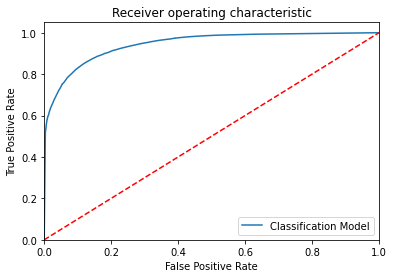

-----------------------------------------------------------------------------------------------------


In [27]:
plott(ModelET)

Model Name:  LGBMClassifier()
Confusion matrix : 
 [[ 6680  2018]
 [ 1322 13858]]
Outcome values : 
 6680 2018 1322 13858
Classification report : 
               precision    recall  f1-score   support

           1       0.83      0.77      0.80      8698
           0       0.87      0.91      0.89     15180

    accuracy                           0.86     23878
   macro avg       0.85      0.84      0.85     23878
weighted avg       0.86      0.86      0.86     23878

Accuracy : 86.0 %
Precision : 83.5 %
Recall : 76.8 %
F1 Score : 0.8
Specificity or True Negative Rate : 91.3 %
Balanced Accuracy : 84.0 %
MCC : 0.694
roc_auc_score: 0.84


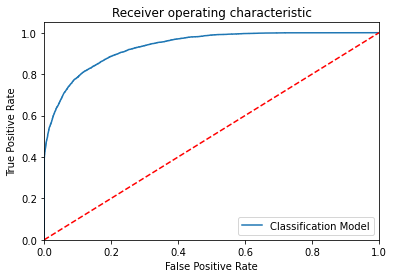

-----------------------------------------------------------------------------------------------------


In [29]:
plott(ModelLGB)